Text(0.5, 0.5, 'SPECULATIVE RESULTS\nEXPERIMENTS STILL RUNNING')

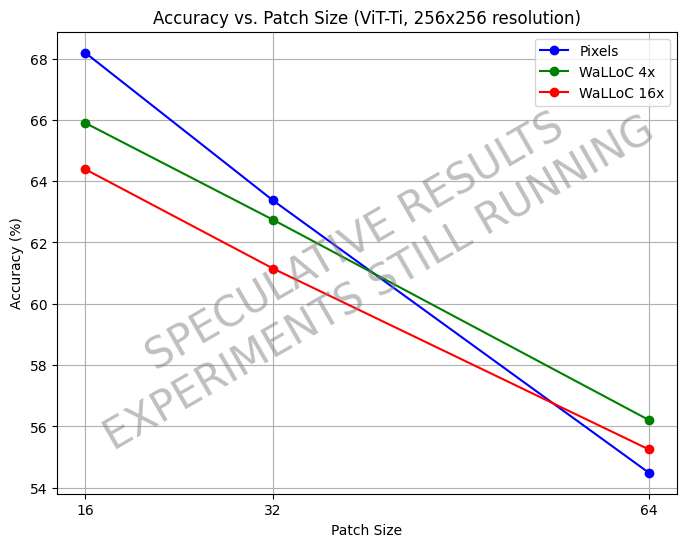

In [13]:
import matplotlib.pyplot as plt

patch_sizes = [16, 32, 64]
pixels_acc = [68.19, 63.37, 54.49]
walloc_4x_acc = [65.90, 62.74, 56.21]
walloc_16x_acc = [64.39, 61.15, 55.25]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(patch_sizes, pixels_acc, marker='o', label='Pixels', color='blue')
plt.plot(patch_sizes, walloc_4x_acc, marker='o', label='WaLLoC 4x', color='green')
plt.plot(patch_sizes, walloc_16x_acc, marker='o', label='WaLLoC 16x', color='red')

# Add titles and labels
plt.title('Accuracy vs. Patch Size (ViT-Ti, 256x256 resolution)')
plt.xlabel('Patch Size')
plt.ylabel('Accuracy (%)')
plt.xticks(patch_sizes)  # Ensure x-axis ticks are at 16, 32, 64
plt.grid(True)
plt.legend()

plt.text(0.5, 0.5, 'SPECULATIVE RESULTS\nEXPERIMENTS STILL RUNNING', 
         fontsize=30, color='gray', alpha=0.5, ha='center', va='center', rotation=30,
         transform=plt.gca().transAxes)